<a href="https://colab.research.google.com/github/ch2kings/AirKING/blob/master/RandomForest%20SMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
data_series = [ 1048, 829, 823, 783, 827, 894, 842, 865, 886, 894, 831, 371, 589, 391, 279, 246, 298, 2761, 20907, 6866, 871, 945, 844, 3516, 6242, 844, 894, 542, 797, 832, 828, 847, 891, 915, 896, 814, 680, 417, 177, 0, 0, 1376, 6111, 18184, 3546, 911, 480, 711, 820, 814, 793, 783, 834, 833, 845, 943, 882, 936, 840, 747, 576, 393, 261, 180, 303, 2975, 12446, 6882, 896, 919, 820, 749, 779, 812, 677, 903, 849, 806, 526, 796, 807, 791, 833, 813, 821, 482, 379, 245, 124, 382, 1776, 13503, 5255, 1757, 1945, 1615, 1092, 822, 856, 843, 862, 899, 835, 821, 825, 821, 837, 551, 725, 649, 412, 283, 134, 384, 886, 11587, 5876, 1251, 1012, 841, 855, 898, 936, 903, 921, 953, 919, 903, 904, 790, 811, 686, 522, 280, 179, 123, 293, 3781, 9501, 1409, 1911, 1329, 1039, 952, 894, 989, 982, 839, 889, 953, 937, 961, 1195, 938, 943, 458, 576, 322, 426, 248, 411, 671, 823, 850, 1278, 1081, 860, 820, 16, ]

auto_arima_model = auto_arima(data_series, start_p=1, start_q=1,
                              test='adf',       # Use adf test to find optimal d
                              max_p=5, max_q=5, # Maximum p and q
                              m=1,              # Frequency of the series
                              d=None,           # Let the model determine 'd'
                              seasonal=False,   # No seasonality
                              start_P=0,
                              D=0,
                              trace=True,
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=True)

auto_arima_model.summary()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3159.833, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3209.048, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3159.126, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3163.341, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3160.221, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3161.404, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3144.460, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3167.734, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3140.681, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3142.612, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3142.732, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3142.386, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3144.631, Time=0.09 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.475 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  169
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1566.340
Date:                Mon, 19 Feb 2024   AIC                           3140.681
Time:                        11:28:03   BIC                           3153.201
Sample:                             0   HQIC                          3145.762
                                - 169                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1131.2982    610.946      1.852      0.064     -66.135    2328.731
ar.L1          0.4399      0.075      5.854      0.000       0.293       0.587
ar.L2         -0.1831      0.174     -1.054      0.292      -0.524       0.158
sigma2      6.641e+06   5.15e+05     12.903      0.000    5.63e+06    7.65e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5265.23
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                             4.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pip install statsmodels

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.4 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Use the optimal parameters found by auto_arima
model = ARIMA(data_series, order=auto_arima_model.order)
model = SARIMAX(data_series, order=auto_arima_model.order, seasonal_order=auto_arima_model.seasonal_order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  169
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1577.110
Date:                Mon, 19 Feb 2024   AIC                           3160.221
Time:                        11:28:36   BIC                           3169.611
Sample:                             0   HQIC                          3164.031
                                - 169                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5505      0.064      8.627      0.000       0.425       0.676
ar.L2         -0.0730      0.166     -0.440      0.660      -0.398       0.252
sigma2      7.538e+06   2.68e+05     28.154      0.0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima


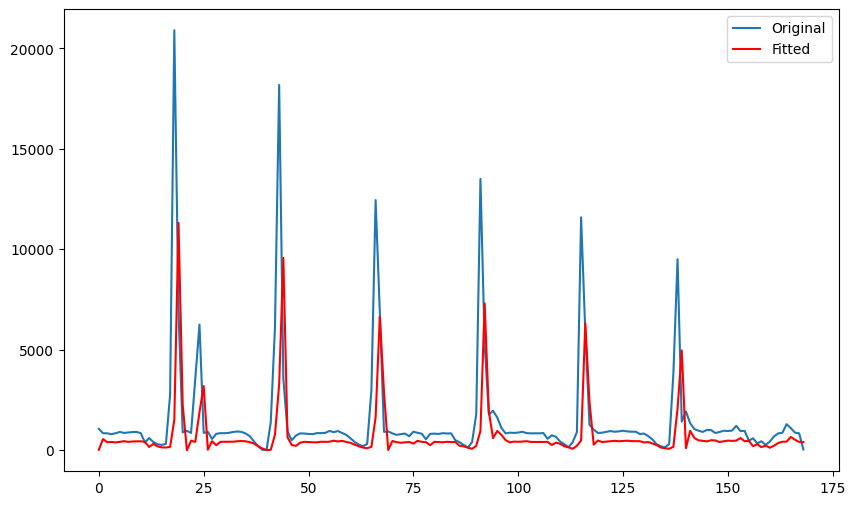

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data_series, label='Original')
plt.plot(model_fit.fittedvalues, color='red', label='Fitted')
# Add code to highlight anomalies if applicable
plt.legend()
plt.show()

In [ ]:
!pip install nltk


In [ ]:
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import word_tokenize

nltk.download('sentiwordnet')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')


[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def get_wordnet_pos(tag):
    """Convert the part-of-speech naming scheme
       from the nltk pos_tag to the wordnet scheme."""
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('V'):
        return wn.VERB
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    else:
        return None

lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Tokenize and POS tag the text
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)

    # Lemmatize and convert POS tags
    lemmatized_tokens = []
    wordnet_tags = []
    for token, tag in pos_tags:
        wordnet_tag = get_wordnet_pos(tag)
        if wordnet_tag is not None:
            lemmatized_tokens.append(lemmatizer.lemmatize(token, pos=wordnet_tag))
            wordnet_tags.append(wordnet_tag)
    return lemmatized_tokens, wordnet_tags


In [ ]:
def analyze_sentiment_sentiwordnet(lemmatized_tokens, wordnet_tags):
    pos_score = neg_score = obj_score = 0

    for token, tag in zip(lemmatized_tokens, wordnet_tags):
        synsets = wn.synsets(token, pos=tag)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        senti_synset = swn.senti_synset(synset.name())
        pos_score += senti_synset.pos_score()
        neg_score += senti_synset.neg_score()
        obj_score += senti_synset.obj_score()

    return pos_score, neg_score, obj_score

# Example usage
text = "This is a great movie, but the ending is quite sad."
lemmatized_tokens, wordnet_tags = preprocess(text)
pos_score, neg_score, obj_score = analyze_sentiment_sentiwordnet(lemmatized_tokens, wordnet_tags)

print(f"Positive score: {pos_score}")
print(f"Negative score: {neg_score}")
print(f"Objective score: {obj_score}")


Positive score: 0.625
Negative score: 1.625
Objective score: 4.75


**Random Forest**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import pandas as pd

# Specify the path to your Excel file
file_path = 'SPAM-text-message.xlsx'

# Use pandas to read the Excel file
data = pd.read_excel(file_path)

# Assuming `data` is your DataFrame
# Ensure all messages are strings
data['Message'] = data['Message'].astype(str)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(data['Message'])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Category'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
#param_grid = {
#    'n_estimators': [50, 100, 200],  # Number of trees in the forest
#    'max_depth': [10, 20, None],  # Maximum depth of the tree
#    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
#    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
#}
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Initialize the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)


Fitting 3 folds for each of 144 candidates, totalling 432 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy', verbose=2)

In [ ]:
from sklearn.metrics import classification_report

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.90      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Use the best model from grid search to make predictions on the test set
y_pred = best_rf.predict(X_test)


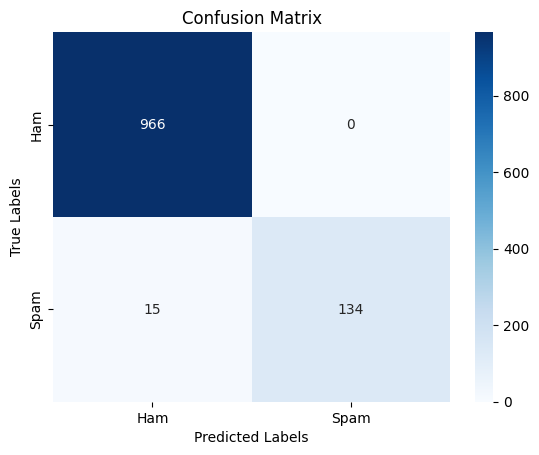

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print classification report for a detailed performance analysis
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


Accuracy: 0.9865
Precision: 1.0000
Recall: 0.8993
F1 Score: 0.9470

Classification Report:

              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       966
        Spam       1.00      0.90      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [ ]:
# Assuming 'grid_search' is your GridSearchCV object
best_rf = grid_search.best_estimator_

# Now, you can use get_params() on best_rf as shown above
model_params = best_rf.get_params()
print("Parameters of the best model found by GridSearchCV:\n")
for param, value in model_params.items():
    print(f"{param}: {value}")


Parameters of the best model found by GridSearchCV:

bootstrap: False
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: auto
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


--------------------------------------------------------------------------------
**Decision Tree**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Specify the path to your Excel file
file_path = 'SPAM-text-message.xlsx'

# Use pandas to read the Excel file
data = pd.read_excel(file_path)
data['Message'] = data['Message'].astype(str)

# Preprocess data: Convert 'Category' into numerical values (spam=1, ham=0)
data['Category'] = data['Category'].map({'spam': 1, 'ham': 0})

In [ ]:
#
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size=0.2, random_state=42)

In [ ]:

# Assuming the initial split and vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

# Fit_transform on the training data and transform on the test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Apply SMOTE to the training data AFTER vectorization
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_tfidf, y_train)




# Training the model (assuming clf is your model, e.g., Decision Tree)
clf.fit(X_train_resampled, y_train_resampled)

# Make sure the error line is corrected as follows:
# This ensures you're using the vectorized test data correctly
y_pred = clf.predict(X_test_tfidf)



Confusion Matrix:
[[942  24]
 [ 18 131]]


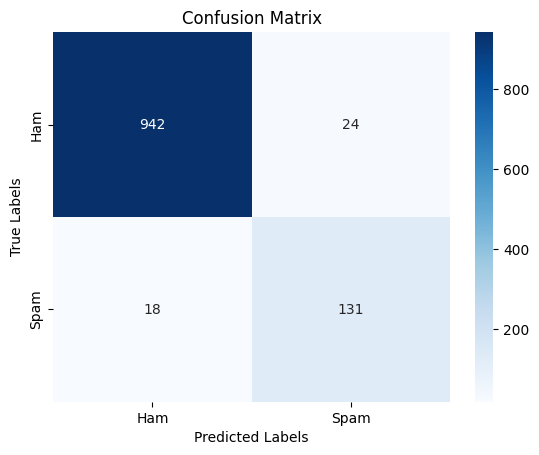

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming the previous steps are already executed and y_pred is available

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'data' is your DataFrame with 'Message' and 'Category' columns

# Preprocess your data, if not already done
# Convert 'Category' to numerical values, text cleaning, etc.

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size=0.2, random_state=42)

# Vectorize the training text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# No oversampling is applied here

# Initialize the Decision Tree Classifier
clf_no_oversampling = DecisionTreeClassifier(random_state=42)

# Train the classifier with the original, unbalanced training data
clf_no_oversampling.fit(X_train_tfidf, y_train)

# Vectorize the test data using the same TF-IDF vectorizer fitted on the training data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Predict the labels for the test set
y_pred_no_oversampling = clf_no_oversampling.predict(X_test_tfidf)

# Evaluate the model's performance without oversampling
accuracy_no_oversampling = accuracy_score(y_test, y_pred_no_oversampling)
report_no_oversampling = classification_report(y_test, y_pred_no_oversampling)

print("Accuracy (No Oversampling):", accuracy_no_oversampling)
print("Classification Report (No Oversampling):\n", report_no_oversampling)


Accuracy (No Oversampling): 0.9730941704035875
Classification Report (No Oversampling):
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.95      0.85      0.89       149

    accuracy                           0.97      1115
   macro avg       0.96      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115



Confusion Matrix:
[[959   7]
 [ 23 126]]


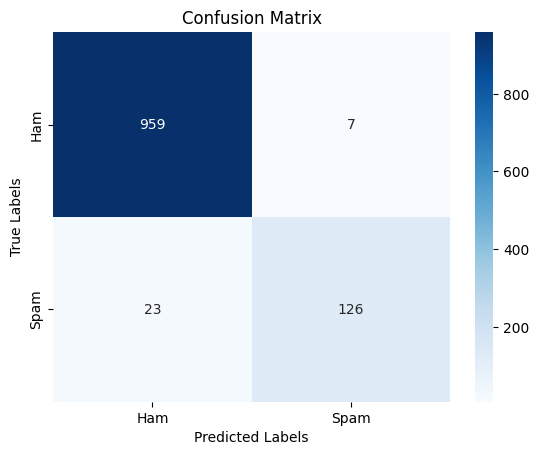

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_no_oversampling)

print("Confusion Matrix:")
print(conf_matrix)


# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


**Prunded Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'data' is your DataFrame with 'Message' and 'Category' columns

# Preprocess your data, if not already done
# Convert 'Category' to numerical values, text cleaning, etc.

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size=0.2, random_state=42)

# Vectorize the training text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Initialize the Decision Tree Classifier with pruning parameters
clf_pruned = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=4, min_samples_leaf=2)

# Train the classifier with the original, unbalanced training data
clf_pruned.fit(X_train_tfidf, y_train)

# Vectorize the test data using the same TF-IDF vectorizer fitted on the training data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Predict the labels for the test set
y_pred_pruned = clf_pruned.predict(X_test_tfidf)

# Evaluate the model's performance with pruning
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
report_pruned = classification_report(y_test, y_pred_pruned)

print("Accuracy (Pruned Decision Tree):", accuracy_pruned)
print("Classification Report (Pruned Decision Tree):\n", report_pruned)


Accuracy (Pruned Decision Tree): 0.9443946188340807
Classification Report (Pruned Decision Tree):
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       966
           1       0.95      0.62      0.75       149

    accuracy                           0.94      1115
   macro avg       0.95      0.81      0.86      1115
weighted avg       0.94      0.94      0.94      1115



Confusion Matrix:
[[959   7]
 [ 23 126]]


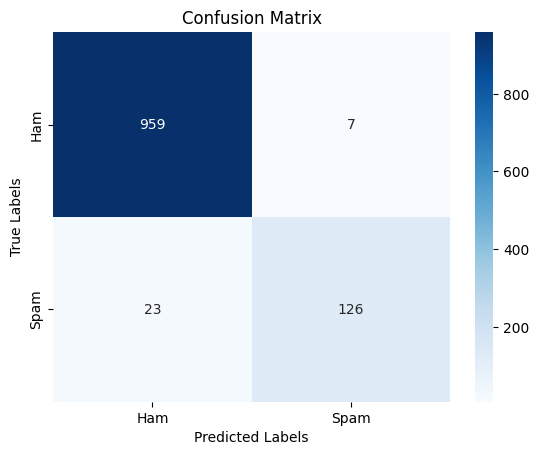

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_no_oversampling)

print("Confusion Matrix:")
print(conf_matrix)


# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Pruned DT**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd

# Assuming 'data' is your DataFrame with 'Message' and 'Category' columns

# Preprocess your data, if not already done
# Convert 'Category' to numerical values, text cleaning, etc.

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size=0.2, random_state=42)

# Vectorize the training text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini'],
    'max_depth': [None, 5, 10, 15, 20, 21, 22],
    'min_samples_split': [10, 20, 21, 22, 23],
    'min_samples_leaf': [1, 2, 4, 8, 10, 12, 16],
    'max_features': [ None],
    'min_impurity_decrease': [0., 0.01, 0.1],
}

# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_tfidf, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator found to predict on the test set
y_pred_optimized = grid_search.best_estimator_.predict(tfidf_vectorizer.transform(X_test))

# Evaluate the model's performance
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
report_optimized = classification_report(y_test, y_pred_optimized)

print("Accuracy (Optimized Decision Tree):", accuracy_optimized)
print("Classification Report (Optimized Decision Tree):\n", report_optimized)


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy (Optimized Decision Tree): 0.9730941704035875
Classification Report (Optimized Decision Tree):
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.95      0.85      0.89       149

    accuracy                           0.97      1115
   macro avg       0.96      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
# Assuming 'grid_search' is your GridSearchCV object
best_rf = grid_search.best_estimator_

# Now, you can use get_params() on best_rf as shown above
model_params = best_rf.get_params()
print("Parameters of the best model found by GridSearchCV:\n")
for param, value in model_params.items():
    print(f"{param}: {value}")

Parameters of the best model found by GridSearchCV:

ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 10
min_weight_fraction_leaf: 0.0
random_state: 42
splitter: best


Confusion Matrix (Optimized Decision Tree):
[[959   7]
 [ 23 126]]


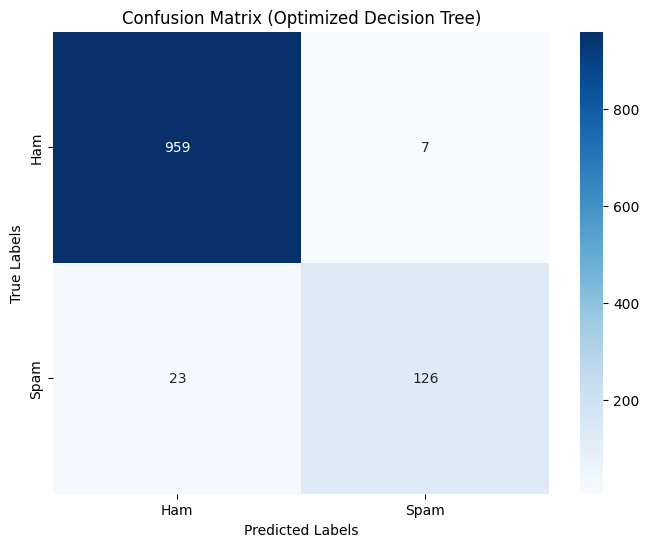

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the rest of the code is unchanged and grid_search has been fitted

# Calculate the confusion matrix
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)

# Print the confusion matrix
print("Confusion Matrix (Optimized Decision Tree):")
print(conf_matrix_optimized)

# For a more visual representation, you can use seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_optimized, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Optimized Decision Tree)')
plt.show()


Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy (Optimized Random Forest): 0.9847533632286996
Classification Report (Optimized Random Forest):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



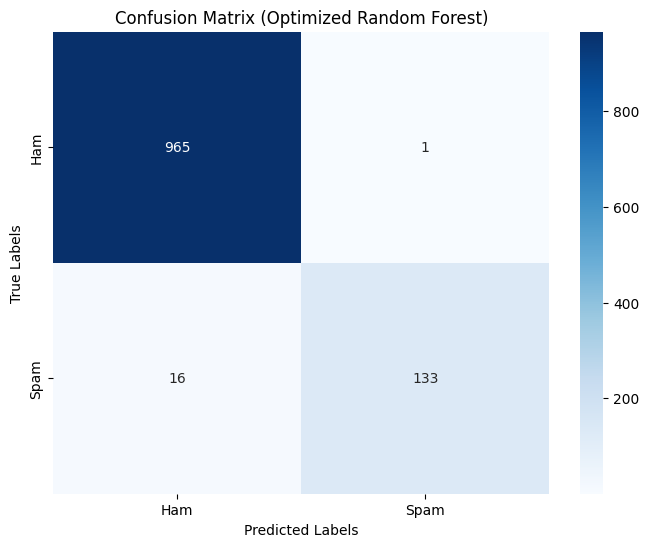

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with 'Message' and 'Category' columns

# Preprocess your data, if not already done
# Convert 'Category' to numerical values, text cleaning, etc.

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size=0.2, random_state=42)

# Vectorize the training text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train_tfidf, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search_rf.best_params_)

# Use the best estimator found to predict on the test set
y_pred_rf_optimized = grid_search_rf.best_estimator_.predict(tfidf_vectorizer.transform(X_test))

# Evaluate the model's performance
accuracy_rf_optimized = accuracy_score(y_test, y_pred_rf_optimized)
report_rf_optimized = classification_report(y_test, y_pred_rf_optimized)
conf_matrix_rf_optimized = confusion_matrix(y_test, y_pred_rf_optimized)

print("Accuracy (Optimized Random Forest):", accuracy_rf_optimized)
print("Classification Report (Optimized Random Forest):\n", report_rf_optimized)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_optimized, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Optimized Random Forest)')
plt.show()


In [ ]:
# Evaluate the model's performance
accuracy_rf_optimized = accuracy_score(y_test, y_pred_rf_optimized)
report_rf_optimized = classification_report(y_test, y_pred_rf_optimized)
conf_matrix_rf_optimized = confusion_matrix(y_test, y_pred_rf_optimized)
precision = precision_score(y_test, y_pred_rf_optimized, average='weighted')  # You can change average method depending on your use case
recall = recall_score(y_test, y_pred_rf_optimized, average='weighted')
f1 = f1_score(y_test, y_pred_rf_optimized, average='weighted')


print("Accuracy (Optimized Random Forest):", accuracy_rf_optimized)
print("Classification Report (Optimized Random Forest):\n", report_rf_optimized)


# Print the performance statistics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print classification report for deta


Accuracy (Optimized Random Forest): 0.9847533632286996
Classification Report (Optimized Random Forest):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy: 0.9922
Precision: 0.9849
Recall: 0.9848
F1 Score: 0.9844


**pre-processing**

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in word_tokens]
    return ' '.join(lemmatized_words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Apply lemmatization to the 'Message' column
data['Message'] = data['Message'].apply(lemmatize_text)

# Proceed with your data splitting, vectorization, and model training as before


In [ ]:
smiley_dict = {
    ":)": "happy",
    ":(": "sad",
    ": (": "sad",
    ";)": "wink",
    "; )": "wink",
    "; )": "wink",
    ":-)": "happy",
    ": )": "happy",
    ":-(": "sad",
    ": (": "sad",
    "; - )": "wink",
    ": - )": "happy",
    ": )": "happy",
    ": - (": "sad",
    "; - )": "wink",
    ":D": "laughing",
    ": D": "laughing",
    "XD": "laughing",
    ":P": "playful",
    ";P": "playful",
    ":-P": "playful",
    ":-D": "laughing",
    ":o": "surprised",
    ":O": "surprised",
    ":-o": "surprised",
    ":-O": "surprised",
    ":'(": "crying",
    ":'-)": "tears_of_joy",
    ":/": "skeptical",
    ":-/": "skeptical",
    "=/": "skeptical",
    "=)": "happy",
    "=-)": "happy",
    ">:(": "angry",
    ">:-(": "angry",
    "<3": "love",
    ":*": "kiss",
    ";*": "kiss",
    ":-*": "kiss",
    "<(')": "penguin",  # Sometimes used to represent cuteness or a specific meme
    # Add more smileys as needed
}


def convert_smileys(text):
    for smiley, word in smiley_dict.items():
        text = text.replace(smiley, word)
    return text


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess_text(text):
    # Convert smileys to words
    text = convert_smileys(text)
    # Remove stop words
    text = remove_stop_words(text)
    # You can also add lemmatization or stemming here
    return text

# Apply preprocessing to the 'Message' column
data['Message'] = data['Message'].apply(preprocess_text)

# Now, proceed with the data splitting, vectorization, and model training


In [ ]:

# Specify the file path and name for the Excel file you want to create
file_path = 'data.xlsx'

# Export y_train to an Excel file
data.to_excel(file_path, index=False)  # Set index=False to not include the index in the file



**ANN**

In [ ]:
# Assuming you have a DataFrame 'data' with 'Message' and 'Category' columns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import DataLoader, TensorDataset

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['Message']).toarray()

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['Category'])

# Now, make sure X_tfidf and y_encoded have the same length
assert X_tfidf.shape[0] == len(y_encoded), "The features and labels do not have the same length."

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Proceed with the creation of TensorDatasets and DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64  # Adjust as needed
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Continue with model building, training, and evaluation


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class TextClassifier(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(TextClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, output_dim)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Model instantiation
input_dim = X_train.shape[1]  # Number of features
output_dim = len(np.unique(y_encoded))  # Number of unique labels

model = TextClassifier(input_dim, output_dim)


In [ ]:
import torch.optim as optim

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 500  # Number of epochs
for epoch in range(epochs):
    model.train()  # Set model to training mode
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Optimize

    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')


Epoch 1/500, Loss: 0.00030184336355887353
Epoch 2/500, Loss: 3.6053370422450826e-07
Epoch 3/500, Loss: 8.228807564591989e-05
Epoch 4/500, Loss: 3.907565769623034e-06
Epoch 5/500, Loss: 9.594732546247542e-07
Epoch 6/500, Loss: 6.910295724082971e-06
Epoch 7/500, Loss: 1.1717283996404149e-06


In [ ]:
# Evaluation mode
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the model on the test set: {100 * correct / total}%')


Accuracy of the model on the test set: 98.56502242152466%


Accuracy: 0.8879
Precision: 0.8942
Recall: 0.8879
F1 Score: 0.8907


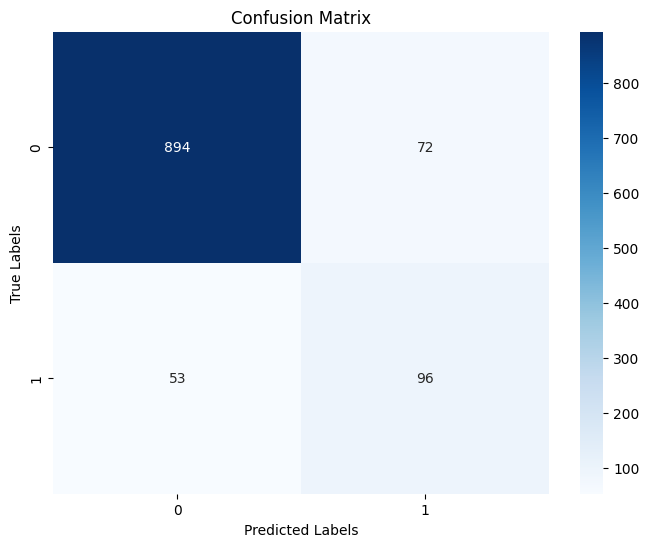

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have y_test and your model predictions y_pred ready
# For this example, let's convert y_pred from PyTorch tensor to numpy array if it's not already
# y_pred = model(X_test_tensor).argmax(dim=1).numpy() # Uncomment if you need to generate y_pred

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Adjust average as appropriate
recall = recall_score(y_test, y_pred, average='weighted')  # Adjust average as appropriate
f1 = f1_score(y_test, y_pred, average='weighted')  # Adjust average as appropriate

# Print performance metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()
